# Bounding box using numpy

In [1]:
import numpy as np
from skimage import transform
import matplotlib.pyplot as plt
import cv2

In [2]:
def fill_oriented_bbox(img, fill_threshold=None, color=1):
    _, contours, _ = cv2.findContours(img, cv2.RETR_LIST, cv2.CHAIN_APPROX_SIMPLE)
    out = np.zeros_like(img, dtype=np.uint8)
    for cnt in contours:        
        # Compute the oriented bounding box
        rect = cv2.minAreaRect(cnt)
        box = cv2.boxPoints(rect)
        box = np.int0(box)
        obbox = np.zeros_like(img, dtype=np.uint8)
        cv2.fillPoly(obbox, [box], color)
        
        if fill_threshold is not None:
            # Fill the contour so we can compare it to the oriented bounding box later
            cnt_fill = np.zeros_like(img, dtype=np.uint8)
            cv2.fillPoly(cnt_fill, [cnt], color)

            # Compare the areas and return the filled bounding box only if the ratio is lower than fill_threshold
            if (np.sum(obbox) / np.sum(cnt_fill) < fill_threshold):
                out = np.where(out > 0, out, obbox)
            else:
                out = np.where(out > 0, out, cnt_fill)
        else:
            out = np.where(out > 0, out, obbox)

    return out

Test image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
OBBox:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 0

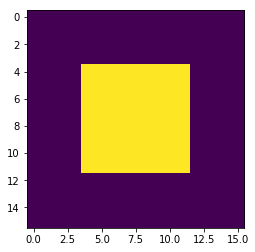

In [3]:
img1 = np.zeros((16,16))
img1[4:12,4:12] = 1
img1 = np.uint8(transform.rotate(img1, 0, order=0))
print("Test image:\n", img1)
obb = fill_oriented_bbox(img1)
print("OBBox:\n", obb)
plt.imshow(obb)

Test image:
 [[  0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0

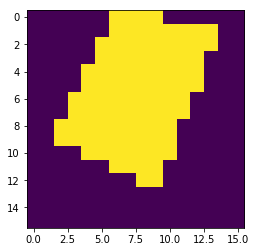

In [4]:
img1 = np.zeros((16,16))
img1[4:12,4:12] = 1.
img1[:4, 5] = 1.
img1 = np.uint8(transform.rotate(img1, -20, order=0) * 255)
print("Test image:\n", img1)
obb = fill_oriented_bbox(img1)
print("OBBox:\n", obb)
plt.imshow(obb)

Test image:
 [[  0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0

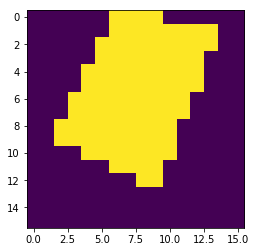

In [5]:
img1 = np.zeros((16,16))
img1[4:12,4:12] = 1.
img1[:4, 5] = 1.
img1 = np.uint8(transform.rotate(img1, -20, order=0) * 255)
print("Test image:\n", img1)
obb = fill_oriented_bbox(img1, fill_threshold=1.5)
print("OBBox:\n", obb)
plt.imshow(obb)

Test image:
 [[  0   0   0   0   0   0   0   0 255   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0 255 255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255 255   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0   0 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255 255 255 255   0   0   0   0]
 [  0   0   0 255 255 255 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0 255 255   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0

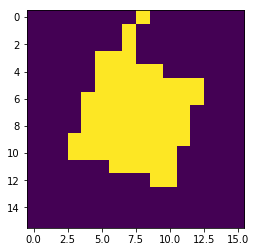

In [6]:
img1 = np.zeros((16,16))
img1[4:12,4:12] = 1.
img1[:4, 5] = 1.
img1 = np.uint8(transform.rotate(img1, -20, order=0) * 255)
print("Test image:\n", img1)
obb = fill_oriented_bbox(img1, fill_threshold=1.2)
print("OBBox:\n", obb)
plt.imshow(obb)

Test image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
OBBox:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0

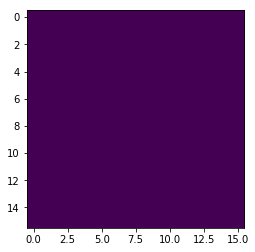

In [7]:
img1 = np.zeros((16,16), dtype=np.uint8)
print("Test image:\n", img1)
obb = fill_oriented_bbox(img1)
print("OBBox:\n", obb)
plt.imshow(obb)

Test image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
OBBox:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0

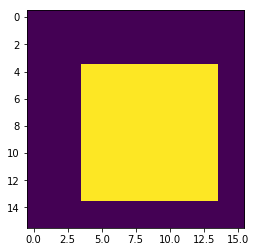

In [8]:
img1 = np.zeros((16,16), dtype=np.uint8)
img1[4:10, 4:10] = 1.
img1[9:14, 9:14] = 1.
print("Test image:\n", img1)
obb = fill_oriented_bbox(img1)
print("OBBox:\n", obb)
plt.imshow(obb)

Test image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
OBBox:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 1 1 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0

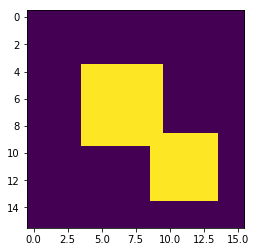

In [9]:
img1 = np.zeros((16,16), dtype=np.uint8)
img1[4:10, 4:10] = 1.
img1[9:14, 9:14] = 1.
print("Test image:\n", img1)
obb = fill_oriented_bbox(img1, fill_threshold=1.2)
print("OBBox:\n", obb)
plt.imshow(obb)

Test image:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]]
OBBox:
 [[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0]
 [0 0 0 0 0 0 0 0 0 1 1 1 1 1 0 0

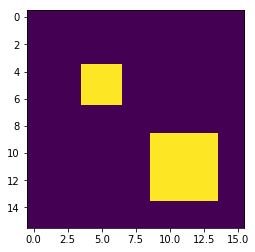

In [10]:
img1 = np.zeros((16,16), dtype=np.uint8)
img1[4:7, 4:7] = 1.
img1[9:14, 9:14] = 1.
print("Test image:\n", img1)
obb = fill_oriented_bbox(img1)
print("OBBox:\n", obb)
plt.imshow(obb)

In [11]:
img1 = np.zeros((768,768))
img1[100:600,150:500] = 1.
img1 = np.uint8(transform.rotate(img1, -45, order=0) * 255)
%timeit fill_oriented_bbox(img1, fill_threshold=1.2)

2.11 ms ± 241 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
